In [2]:
import pandas as pd
import set_lib_paths
import numpy as np
import seaborn as sns
import copy
sns.set()
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
pd.options.display.max_rows = 15
pd.options.display.max_columns = 40
case_study_codes = ['303', '004']
merged_file = 'F:/Projects/Ferring/data/pre_modelling/merged_data/MERGED_COUNT_DATE.csv'
df = pd.read_csv(merged_file)
#Remove patients that did not complete study...a2
df = df[df['COMPLETED'] & ~df['COMPLETED'].isnull()]
df['GESTATIONAL_AGE_WEEKS'] = df['GESTATIONAL_AGE_DAYS']/7
print (len(df))

4443


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (5,6,8,9,11,12,15,16,18,19,31,2594) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [171]:
df.loc[df['MODE_OF_DELIVERY'].str.contains('VAGINAL'), 'MODE_OF_DELIVERY'] = 'VAGINAL'



In [175]:
df['MODE_OF_DELIVERY']

0       CESAREAN SECTION
1       CESAREAN SECTION
2       CESAREAN SECTION
3                VAGINAL
4       CESAREAN SECTION
5                VAGINAL
6       CESAREAN SECTION
              ...       
1107             VAGINAL
1108    CESAREAN SECTION
1109             VAGINAL
1110    CESAREAN SECTION
1111             VAGINAL
1112             VAGINAL
1113    CESAREAN SECTION
Name: DD_DELIVERY_METHOD, Length: 1111, dtype: object

In [104]:
df.groupby(['STUDY_CODE', col]).size().apply(lambda x:100*(x/1114))

STUDY_CODE  RACE    
4           ASIAN        1.077199
            BLACK/AA     7.540395
            HISPANIC    11.131059
            OTHER        1.526032
            WHITE       17.414722
303         ASIAN        1.256732
            BLACK/AA    19.030521
            HISPANIC    12.387792
            OTHER        1.705566
            WHITE       26.660682
dtype: float64

In [137]:
df['AGE'].mean()

25.915391539153916

In [96]:
print(df[df['COMPLETED'].isnull()]['USUBJID'])
print(df[df['DD_DELIVERY_TIME'].isnull()]['USUBJID'])

724     004-06-1060223
729     004-06-2060240
731     004-06-2060246
1114    004-06-1060227
1115    004-32-2321339
Name: USUBJID, dtype: object
729     004-06-2060240
731     004-06-2060246
1114    004-06-1060227
1115    004-32-2321339
Name: USUBJID, dtype: object


[(0.29803921568627451, 0.44705882352941179, 0.69019607843137254),
 (0.33333333333333331, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.30588235294117649, 0.32156862745098042),
 (0.50588235294117645, 0.44705882352941179, 0.69803921568627447),
 (0.80000000000000004, 0.72549019607843135, 0.45490196078431372),
 (0.39215686274509803, 0.70980392156862748, 0.80392156862745101)]

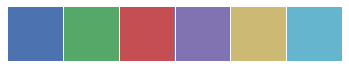

In [32]:
current_palette = sns.color_palette()
sns.palplot(current_palette)
current_palette

In [150]:
#Create time to oxytocin admin col
df['TIME_DELTA_EX_START_OXYTOCIN_ADMIN'] = (pd.to_datetime(df['OAENTPT']) - pd.to_datetime(df['EX_START_TIME']))/ np.timedelta64(1, 'h')

In [208]:
df['TIME_DELTA_EX_START_ONSET_LABOUR'] = (pd.to_datetime(df['ACTIVE LABOR']) - pd.to_datetime(df['EX_START_TIME']))/ np.timedelta64(1, 'h')

In [211]:
df['TIME_DELTA_EX_START_ONSET_LABOUR'].mean()

19.65086178861791

In [212]:
df['TIME_DELTA_EX_START_ONSET_LABOUR'].isnull().sum()

86

In [227]:
df['label'] = (df['TIME_DELTA_EX_START_ONSET_LABOUR'] <=24) & (df['MODE_OF_DELIVERY'] == 'VAGINAL')
df['label'] = df['label'].astype(int)


In [234]:
df.groupby(['STUDY_CODE', 'label']).size().unstack(0)

STUDY_CODE,4,303
label,,
0,183,359
1,248,321


In [204]:
list(df.filter(regex='^[^MHTERM]').keys())

['Unnamed: 0',
 'ACTIVE LABOR',
 'AGE',
 'BMI',
 'BS_12',
 'BS_18',
 'BS_24',
 'BS_6',
 'BS_BASELINE',
 'COMPLETED',
 'COUNTRY',
 'COUNTRY_dummy_CAN',
 'COUNTRY_dummy_USA',
 'DD_DELIVERY_METHOD',
 'DD_DELIVERY_TIME',
 'DELIVERY',
 'GESTATIONAL_AGE_DAYS',
 'L&D DISCHARGE',
 'OAENTPT',
 'OXYTOCIN_ADMINISTERED',
 'OXYTOCIN_DOSAGE',
 'PREGTYPE_NULLIPAROUS',
 'PREGTYPE_PAROUS',
 'STUDY_CODE',
 'SUBJID',
 'USUBJID',
 'Unnamed: 0.1',
 'Unnamed: 0_x',
 'Unnamed: 0_x.1',
 'Unnamed: 0_x.2',
 'Unnamed: 0_x.3',
 'Unnamed: 0_y',
 'Unnamed: 0_y.1',
 'Unnamed: 0_y.2',
 'Unnamed: 0_y.3',
 'WEIGHT',
 'GESTATIONAL_AGE_WEEKS']

In [206]:
df.filter(regex='^[^MHTERM]')['DELIVERY'].isnull().sum()

0

In [203]:
df['TIME_Edf.filter(regex='^[^MHTERM]')['ACTIVE LABOR']

86

# Produce plots

In [294]:
#Standard distribution plots
plot_cols = {'AGE':'Patient Age', 'BS_BASELINE': 'Baseline Modified Bishop Score', 'OXYTOCIN_DOSAGE': 'Pre-delivery Oxytocin Dosage [Units]', 'BMI':'BMI', 'HEIGHT':'Height [m]', 'WEIGHT': 'Weight [kg]', 'GESTATIONAL_AGE_DAYS': 'Gestational Age [days]', 'RACE': 'Ethnicity', 'GESTATIONAL_AGE_WEEKS': 'Gestational Age [weeks]', 'TIME_DELTA_EX_START_OXYTOCIN_ADMIN': 'Time between Propess administration and Oxytocin administration [hours]', 'TIME_DELTA_EX_START_ONSET_LABOUR': 'Time between Propess administration and onset of Active Labour [hours]'}
def plot_multi(df, grouped_df, cols, cust_labels, group_keys, group_col, suffix='', kde=False, box_plots=True):
        if kde:
            suffix += '_kde'
        n_patients = len(df)
        plt.clf()
        #sns.distplot(df['GESTATIONAL_AGE_DAYS'][df['STUDY_CODE'] == 303].dropna(), kde=False)
        bs_cols = list(df.filter(regex='^BS_').keys())
        #
        #for col in bs_cols:
        #    sns.distplot(df[col].dropna(), label=col.split('_')[1], kde=False, bins=range(12), hist_kws={"alpha":0.4})
        for col,x_title in plot_cols.items():
            plt.clf()
            if box_plots and col != 'RACE':        f, (ax_box1, ax_box2, ax_box3, ax_hist) = plt.subplots(4, sharex=True, 
                                            gridspec_kw={"height_ratios": (.05, .05, .05, .85)})
            #else: 
            #    f, (ax_hist) = plt.subplots(1, sharex=True, gridspec_kw={"height_ratios": (1)})

            if col in ['BS_BASELINE', 'RACE']: 
                if kde: continue
                #ax = sns.distplot(df[col].dropna(), kde=False, bins=range(12), hist_kws={"alpha":0.4})
                #[df[col].dropna()]
                if col == 'BS_BASELINE':
                    #df.groupby(['STUDY_CODE', col]).size().apply(lambda x:100*(x/n_patients)).unstack(0).plot.bar(stacked=True, edgecolor='white', ax=ax_hist)
                    if box_plots: ax_hist = df.groupby([group_col, col]).size().unstack(0).plot.bar(stacked=True, edgecolor='white', ax=ax_hist)
                    else:ax_hist = df.groupby([group_col, col]).size().unstack(0).plot.bar(stacked=True, edgecolor='white')
                else:
                    df.loc[df['RACE']=='BLACK_OR_AFRICAN_AMERICAN', 'RACE'] = 'BLACK/AA'
                    ax = df.groupby([group_col, col]).size().unstack(0).plot.bar(stacked=True, edgecolor='white', rot=0)
            else: #ax = sns.distplot(df[col].dropna(), kde=False, hist_kws={"alpha":0.4})
                #ax = df.groupby(['STUDY_CODE', col]).size().unstack(0).plot.hist(stacked=True, edgecolor='white')
                #df[col].plot.hist(edgecolor='white')
                n_bins = 10
                if 'TIME_DELTA' in col: n_bins = 30
                if not kde:
                    df_c = pd.DataFrame({cust_labels[0]: grouped_df.get_group(group_keys[0])[col], cust_labels[1] :  grouped_df.get_group(group_keys[1])[col]})
                    if box_plots: plot = df_c.plot.hist(stacked=True, edgecolor='white', ax=ax_hist, bins=n_bins)
                    else: ax_hist = df_c.plot.hist(stacked=True, edgecolor='white',bins=n_bins)
                else:
                    print(col)
                    sns.kdeplot(grouped_df.get_group(group_keys[0])[col], label=cust_labels[0], shade=True)
                    sns.kdeplot(grouped_df.get_group(group_keys[1])[col], label=cust_labels[1], shade=True)
                    plot = sns.kdeplot(df[col], label='COMBINED', shade=True)
            #ax.text(0.3, 1.3,'Patients with missing information: %.2f%%'%((n_missing*100)/len(df)))

            if col == 'RACE':
                plt.xlabel(x_title)
                plt.ylabel('Number of Patients')

                handles, labels = ax.get_legend_handles_labels()
                labels[0]  = cust_labels[0]
                labels[1]  = cust_labels[1]
                #labels[0] = 'MISO-OBS-004'
                #labels[1] = 'MISO-OBS-303'
                print(labels)
                plt.legend(handles, labels)
                plt.savefig('F:/Projects/Ferring/results/pre_modelling/sprint_1_2_plots/' + col.lower() + suffix + '.svg', format='svg', dpi=1200)
                continue
            #ax2 = ax.twinx()
            if box_plots:
                sns.boxplot(x=df[df['STUDY_CODE']==4][col].dropna(), ax=ax_box2, showmeans=True, color=current_palette[0])
                sns.boxplot(x=df[df['STUDY_CODE']==303][col].dropna(), ax=ax_box1, showmeans=True, color=current_palette[1])
                bx = sns.boxplot(x=df[col].dropna(), ax=ax_box3, showmeans=True, color=current_palette[3])

                ax_box3.set(yticks=[])
                ax_box1.set(yticks=[])
                ax_box2.set(yticks=[])


            handles, labels = ax_hist.get_legend_handles_labels()
            plt.ylabel('Number of Patients')
            if handles and not kde:
                if box_plots:
                    handles.append(copy.copy(handles[-1]))
                    try: handles[-1].set_facecolor(current_palette[3])
                    except: 
                        handles[-1] = copy.copy(prev_handles[-1])
                        handles[-1].set_facecolor(current_palette[3])
                    labels.append('COMBINED')
                if 'BS' in col: 
                    labels[0]  = cust_labels[0]
                    labels[1]  = cust_labels[1]
                    #plt.ylabel('Number of Patients')
                    #for item in handles[-1].get_children(): 
                    #    item.set_facecolor(current_palette[3])

                
                plt.legend(handles, labels)

            prev_handles = handles
            #ax2.set(ylim=(-10,5))
            #n_missing = df[col].isnull().sum()

            plt.xlabel(x_title)

            plt.savefig('F:/Projects/Ferring/results/pre_modelling/sprint_1_2_plots/' + col.lower() + suffix + '.svg', format='svg', dpi=1200)
            #sns.violinplot(x='')
            #plt.legend()
#plt.show()


#df['BS_BASELINE'].plot(kind='hist')


['MISO-OBS-004', 'MISO-OBS-303']


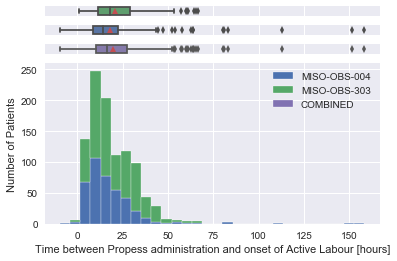

In [210]:
plot_multi(df, grouped_df, plot_cols, ['MISO-OBS-004', 'MISO-OBS-303'], [4, 303], 'STUDY_CODE')

['MISO-OBS-004', 'MISO-OBS-303']


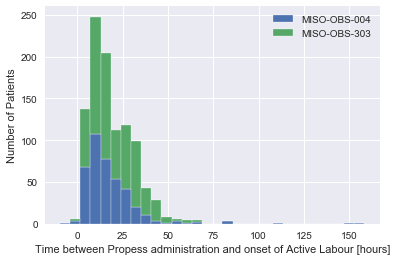

In [295]:
plot_multi(df, grouped_df, plot_cols, ['MISO-OBS-004', 'MISO-OBS-303'], [4, 303], 'STUDY_CODE', box_plots=False, suffix='_no_box')

In [237]:
grouped_df_dm = df.groupby('label')

In [185]:
grouped_df_dm.get_group('VAGINAL')['BS_BASELINE']

3       4.0
5       3.0
8       3.0
9       2.0
10      3.0
11      1.0
12      3.0
       ... 
1103    4.0
1104    3.0
1105    2.0
1107    0.0
1109    3.0
1111    2.0
1112    3.0
Name: BS_BASELINE, Length: 802, dtype: float64

['SUCCESS', 'FAILURE']


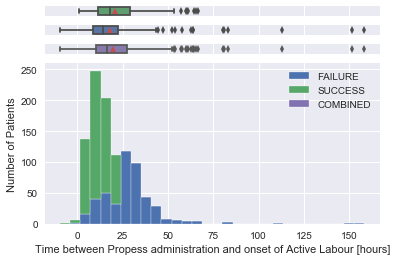

In [238]:
plot_multi(df, grouped_df_dm, plot_cols, ['SUCCESS', 'FAILURE'], [1, 0], 'label', suffix='_outcome')

AGE
OXYTOCIN_DOSAGE


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


BMI
HEIGHT
WEIGHT
GESTATIONAL_AGE_DAYS
GESTATIONAL_AGE_WEEKS
TIME_DELTA_EX_START_OXYTOCIN_ADMIN
TIME_DELTA_EX_START_ONSET_LABOUR


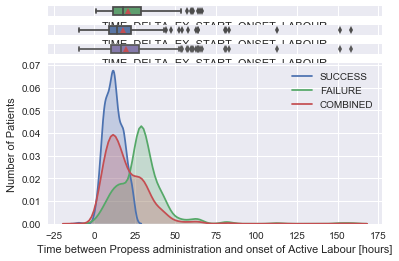

In [239]:
plot_multi(df, grouped_df_dm, plot_cols, ['SUCCESS', 'FAILURE'], [1, 0], 'label', suffix='_outcome', kde=True)

In [235]:
df.groupby(['label', 'OXYTOCIN_ADMINISTERED']).size().unstack(0).transpose()*100/n_patients

OXYTOCIN_ADMINISTERED,False,True
label,,
0,6.930693,41.854185
1,20.972097,30.243024


In [236]:
df.groupby(['label', 'OXYTOCIN_ADMINISTERED']).size().unstack(0).transpose()

OXYTOCIN_ADMINISTERED,False,True
label,,
0,77,465
1,233,336


In [193]:
(df['BMI'] > 50).sum()

19

In [195]:
(df[df['STUDY_CODE'] == 303]['BMI'] > 50).sum()

5

In [197]:
df['GESTATIONAL_AGE_WEEKS'].mean()

39.61347563327767

In [199]:
df['TIME_DELTA_EX_START_OXYTOCIN_ADMIN'].mean()

31.111921648091847

In [256]:
df[df['ACTIVE LABOR'].isnull() & (df['MODE_OF_DELIVERY'] == 'VAGINAL')].groupby('STUDY_CODE').size()

STUDY_CODE
4      1
303    4
dtype: int64

In [250]:
df['TIME_DELTA_ADMIN_DELIVERY'] = (pd.to_datetime(df['DD_DELIVERY_TIME']) - pd.to_datetime(df['EX_START_TIME'] ))/np.timedelta64(1, 'h')

In [257]:
df[df['ACTIVE LABOR'].isnull()].groupby('STUDY_CODE').size()

STUDY_CODE
4      32
303    54
dtype: int64

In [281]:
list(df[df['ACTIVE LABOR'].isnull() & (df['MODE_OF_DELIVERY'] == 'VAGINAL')].filter(regex='^TIME|L&D|USUBJID')['USUBJID'].tolist())

['303-10-11005',
 '303-10-20152',
 '303-11-17506',
 '303-25-12501',
 '004-30-1301228']

In [269]:
len(df[df['ACTIVE LABOR'].isnull() & (df['MODE_OF_DELIVERY'] != 'VAGINAL')])

81

In [271]:
df['ACTIVE_LT_24'] = df['TIME_DELTA_EX_START_ONSET_LABOUR'] <= 24

In [278]:
df.groupby(['MODE_OF_DELIVERY', 'ACTIVE_LT_24']).size().unstack(0)

DD_DELIVERY_METHOD,CESAREAN SECTION,VAGINAL
ACTIVE_LT_24,,
False,180,233
True,129,569


In [274]:
df['ACTIVE_LT_24'][df['ACTIVE LABOR'].isnull()].sum()

0

In [308]:
df[df['BS_BASELINE'].isnull()].filter(regex='^[^MHTERM]')['USUBJID'].tolist()

['303-27-22761', '004-21-1210843', '004-21-1210852', '004-21-2210873']

In [13]:
mhterms = list(df.filter(regex='^MHTERM').filter(regex='COUNT$').keys())

In [18]:
[term.replace('MHTERM_', '').replace('_COUNT', '') for term in mhterms if ('GBS' in term) or ('GROUP' in term) or ('STREP' in term)]

['+GBS_-_2006',
 '+GBS',
 '+_GBS',
 'GBS+',
 'GBST',
 'GBS_(GROUP_B_STREP)_POSITIVE',
 'GBS_+VE',
 'GBS_+',
 'GBS_+_VE',
 'GBS_CARRIER',
 'GBS',
 'GBS_POSITIVE_8/10/06',
 'GBS_POSITIVE',
 'GBS_POSTITIVE',
 'GBS_POS',
 'GBS_STATUS_UNKNOWN_TREATED_PROPHALACTIC',
 'GBS_UNKNOWN',
 'GROUP_BETA_STRAP_POSITIVE',
 'GROUP_BETA_STREP:_POSITIVE;_APRIL_2006',
 'GROUP_BETA_STREP_POSITIVE,_2006',
 'GROUP_BETA_STREP_POSITIVE,_2007',
 'GROUP_BETA_STREP_POSITIVE-2006',
 'GROUP_BETA_STREP_POSITIVE-_2006',
 'GROUP_BETA_STREP_POSITIVE_(VAGINAL)',
 'GROUP_BETA_STREP_POSITIVE',
 'GROUP_B_STREPTOCOCCUS',
 'GROUP_B_STREP',
 'GROUP_B_STREP_POSITIVE',
 'GROUP_B_VAGINAL_STREP',
 'GROUP_STREP_B_POSITIVE',
 'POS._GBS',
 'POSITIVE_FOR_GROUP_BETA_STREP',
 'POSITIVE_GBS_-_DX_3/3/06',
 'POSITIVE_GBS',
 'POSITIVE_GROUP_BETA_STREP',
 'POSITIVE_GROUP_B_STREP',
 'POS_GBS',
 'REMOTE_HISTORY_VAGINAL_GROUP_B_STREP',
 'URINARY_TRACT_INFECTION_(GROUP_B_STREP)',
 'VAGINAL_GROUP_BETA_STREP_POSITIVE',
 'VAGINAL_GROUP_B_STREP_POSI

In [45]:
[term.replace('MHTERM_', '').replace('_COUNT', '') for term in mhterms if ('HYPERTENSION' in term)]

['BORDERLINE_HYPERTENSION,_2007',
 'CHRONIC_HYPERTENSION',
 'GESTATIONAL_HYPERTENSION,_1990',
 'GESTATIONAL_HYPERTENSION,_2007',
 'GESTATIONAL_HYPERTENSION',
 'HYPERTENSION,_CHRONIC',
 'HYPERTENSION',
 'HYPERTENSION_WITH_PREGNANCY,MILD_PREECLAMPSIA',
 'HYPERTENSION_WITH_PREGNANCY',
 'HYPERTENSION__:_ONSET_UNKNOWN',
 'INDUCED_DUE_TO_INCREASED_BLOOD_PRESSURE_SECONDARY_TO_PREGNANCY_INDUCED_HYPERTENSION',
 'INTERMITTENT_HYPERTENSION',
 'PIH,_PREGNANCY-INDUCED_HYPERTENSION_(GESTATIONAL)',
 'PREGNANCY-INDUCED_HYPERTENSION',
 'PREGNANCY_INDUCED_HYPERTENSION,_2007',
 'PREGNANCY_INDUCED_HYPERTENSION',
 'TRANSIENT_HYPERTENSION_OF_PREGNANCY']

In [42]:
YEAST [term.replace('MHTERM_', '').replace('_COUNT', '') for term in mhterms if ('BIPOLAR' in term) or ('DEPR' in term)]

['ANXIETY/DEPRESSION',
 'ANXIETY/DEPRESSIVE_DISORDER_-_2005',
 'ANXIETY_DEPRESSION',
 'BIPOLAR._BORDERLINE_PERSONALITY_DISORDER',
 'BIPOLAR_(DIAGNOSED_IN_2006)',
 'BIPOLAR_ANXIETY_DISORDER',
 'BIPOLAR',
 'BIPOLAR_DEPRESSION',
 'BIPOLAR_DISODER',
 'BIPOLAR_DISORDER',
 'DEPRESSION,_2006',
 'DEPRESSION,_BORDERLINE_PERSONALITY,_POST_TRAUMATIC_STRESS_DISORDER',
 'DEPRESSION,_UNSPECIFIED',
 'DEPRESSION/ANXIETY',
 'DEPRESSION_-_PT._REPORTS_MILD_TO_MODERATE.',
 'DEPRESSION_2_YEARS_AGO',
 'DEPRESSION',
 'DEPRESSION_RELATED_TO_POLYCYSTIC_OVARIAN_SYNDROME',
 'DEPRESSION_SYMPTOMS',
 'DEPRESSION_WITH_ANXIETY',
 'DEPRESSION_WITH_HISTORY_OF_MULTIPLE_SUICIDE_ATTEMPTS',
 'DEPRESSIVE_DISORDER',
 'H/O_DEPRESSION',
 'HISTORY_OF_DEPRESSION',
 'HISTORY_OF_POSTPARTUM_DEPRESSION',
 'HISTORY_OF__PANIC_ATTACKS_AND_POST-PARTUM_DEPRESSION_POST_D_AND_C',
 'HX_DEPRESSION',
 'HX_OF_DEPRESSION',
 'HX_OF_POST_PARTUM_DEPRESSION',
 'POST_PARTUM_DEPRESSION',
 'PT_REPORTS_DEPRESSION_AND_ANXIETY_X_3_MONTHS_IN_2004.__SUICID

In [43]:
[term.replace('MHTERM_', '').replace('_COUNT', '') for term in mhterms if ('ANEMIA' in term)]

['ANEMIA,_2007',
 'ANEMIA,_HGB_"WATTS"',
 'ANEMIA,_STARTED_ON_IRON_SUPPLEMENT_7/06',
 'ANEMIA-2006',
 'ANEMIA-ON_IRON',
 'ANEMIA-_2006',
 'ANEMIA_(IRON_DEFICIENCY)',
 'ANEMIA_(PREGNANCY-RELATED,_GENERAL,_MILD)',
 'ANEMIA_13_MARCH_06',
 'ANEMIA',
 'ANEMIA_DURING_PREGNANCY',
 'ANEMIA_IN_PREGNANCY_-_2006',
 'ANEMIA_IN_PREGNANCY_-_TX',
 'IRON_DEFICICIENCY_ANEMIA',
 'IRON_DEFICIENCY_ANEMIA.',
 'IRON_DEFICIENCY_ANEMIA',
 'IRON_DEFICIENT_ANEMIA',
 'MILD_ANEMIA',
 'NORMOCYTIC_ANEMIA',
 'SEVERE_ANEMIA',
 'SICKLE_CELL_ANEMIA_TRAIT']

In [47]:
[term.replace('MHTERM_', '').replace('_COUNT', '') for term in mhterms if ('YEAST' in term)]

['VAGINAL_YEAST_INFECTION',
 'YEAST_(VAGINAL)',
 'YEAST_INFECTION-2006',
 'YEAST_INFECTION-_2006',
 'YEAST_INFECTION_(CANDIDIASIS)',
 'YEAST_INFECTION',
 'YEAST_INFECTION_DURING_PREGNANCY',
 'YEAST_VAGINITIS']

In [48]:
[term.replace('MHTERM_', '').replace('_COUNT', '') for term in mhterms if ('URINARY' in term) or ('UTI' in term)]

['DX_UTI_1ST_TIMESTER_-_TX',
 'FREQUENT_URINARY_TRACT_INFECTIONS',
 "FREQUENT_UTI'S",
 "FREQUENT_UTI'S_IN_PREGNANCY",
 'GU-_URINARY_TRACT_INFECTION',
 'HISTORY_OF_URINARY_TRACK_INFECTIONS',
 'HISTORY_OF_UTI_IN_PREGNANCY',
 'HX_OF_MULTIBLE_URINARY_TRACT_INFECTIONS',
 "HX_OF_UTI'S",
 'HX_URINARY_TRACT_INFECTION',
 'INFREQUENT_URINARY_TRACT_INFECTIONS',
 'PREVIOUS_URINARY_TRACT_INFECTION',
 'RECENT_URINARY_TRACT_INFECTION',
 'RECENT_UTI',
 'RECURRENT_URINARY_TRACT_INFECTIONS',
 'RECURRENT_URINARY_TRACT_INFECTION_(UTI)',
 'RECURRENT_URINARY_TRACT_INFECTION',
 'RECURRENT_UTIS',
 'URINARY_INFECTION',
 'URINARY_TRACK_INFECTION',
 'URINARY_TRACT_INFECTION,_MULTIPLE_8/06-10/06',
 'URINARY_TRACT_INFECTIONS',
 'URINARY_TRACT_INFECTIONS_THROUGHOUT_PREGNANCY',
 'URINARY_TRACT_INFECTION_(GROUP_B_STREP)',
 'URINARY_TRACT_INFECTION',
 'URINARY_TRACT_INFECTION_HISTORY',
 'URINARY_TRACT_INFECTION_X2/YEAR',
 'UTI,_RECURRENT',
 'UTI=URINARY_TRACT_INFECTION',
 'UTI_(LOWER_TRACT)',
 'UTI_2/20/06',
 'UTI_21/

In [51]:
[term.replace('MHTERM_', '').replace('_COUNT', '') for term in mhterms if ('DIABETES' in term and 'CLASS' in term)]

['CLASS_B_DIABETES',
 'CLASS_C_DIABETES_MELLITUS',
 'DIABETES,_GESTATIONAL_(ALL_TYPES/CLASSES)',
 'DIABETES,_TYPE_I_(INSULIN_DEPENDENT,_ALL_CLASSES)']